In [330]:
import os
import argparse
import glob
import numpy as np
import pickle
import json
import cv2
import open3d as o3d
import matplotlib.pyplot as plt
from projection_utils import Projection
from data_parser import read_keypoints

In [331]:
# _____________ read frames _____________
data_root = '../quantitative/recordings'
sequence_id = 'vicon_03301_01'
save_root = '../quantitative/proximity'

rgb_list = glob.glob(os.path.join(data_root, sequence_id, 'Color/*.jpg'))
rgb_list.sort()
# rgb_list[-1][-33:-30]
n_frame = int(rgb_list[-1][-33:-30])  # total frame number
# rgb_list
n_frame
# rgb_list[-1][-34:-4]

10

In [332]:
# _____________ init _____________
projection = Projection("../quantitative/calibration")
MAX_DEPTH = 20.0
depth_scale = 1e3       # TODO: determine depth_scale
point_cloud = o3d.geometry.PointCloud()
vis = o3d.visualization.Visualizer()
h = 1080
w = 1920

curr_frame = rgb_list[5]

In [333]:
depth_im = cv2.imread(os.path.join(data_root, sequence_id, 'Depth/' + curr_frame[-34:-4] + '.png'), flags=-1)
# depth_im.shape
rgb_im = cv2.imread(curr_frame)
rgb_im = rgb_im[:, :, ::-1]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

(array([   55.,  8395., 26749., 16587.,  6074.,  3744.,  1383.,  8330.,
         9093.,  9430.]),
 array([0.547 , 1.2922, 2.0374, 2.7826, 3.5278, 4.273 , 5.0182, 5.7634,
        6.5086, 7.2538, 7.999 ]),
 <BarContainer object of 10 artists>)

127248

89840

<Figure size 432x288 with 0 Axes>

(array([   45.,   524., 26404., 16551.,  6009.,  3696.,  1384.,  8330.,
         9035.,  9397.]),
 array([4.0000e-03, 7.4880e-01, 1.4936e+00, 2.2384e+00, 2.9832e+00,
        3.7280e+00, 4.4728e+00, 5.2176e+00, 5.9624e+00, 6.7072e+00,
        7.4520e+00]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

(array([1.992237e+06, 4.900000e+01, 1.056900e+04, 2.761500e+04,
        9.904000e+03, 4.281000e+03, 1.973000e+03, 6.544000e+03,
        1.082100e+04, 9.607000e+03]),
 array([-0.547 ,  0.2529,  1.0528,  1.8527,  2.6526,  3.4525,  4.2524,
         5.0523,  5.8522,  6.6521,  7.452 ]),
 <BarContainer object of 10 artists>)

1

2073599

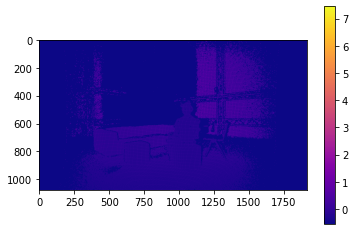

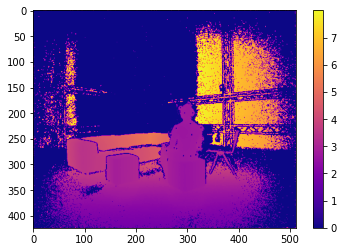

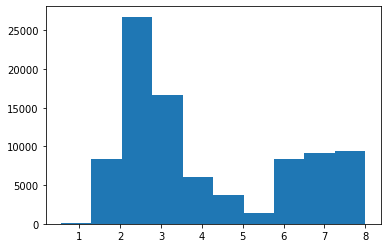

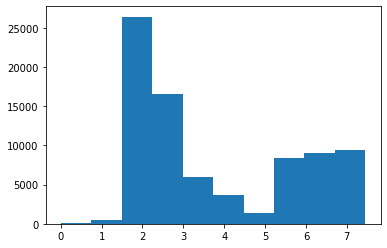

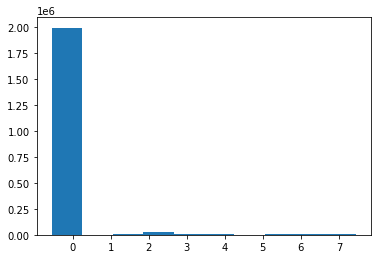

In [334]:
depth_img = cv2.imread(os.path.join(data_root, sequence_id, 'Depth/' + curr_frame[-34:-4] + '.png'), flags=-1).astype(float)
depth_raw = depth_img.copy()
depth_img /= 8.0
depth_img /= 1000.0
color_img = cv2.imread(curr_frame)
color_img = cv2.flip(color_img, 1)
depth_img = cv2.flip(depth_img, 1)
depth_raw = cv2.flip(depth_raw, 1)
# color_aligned = projection.align_color2depth(depth_img, color_img)
depth_aligned = projection.align_depth2color(depth_img, depth_raw)
# depth_aligned.shape

depth_aligned = depth_aligned.astype(float)
min = np.min(depth_aligned[depth_aligned > 0])
depth_aligned = depth_aligned - min
MAX_DEPTH = np.max(depth_aligned)
depth_aligned[depth_aligned > MAX_DEPTH] = 0
# depth_aligned /= 8.0
# depth_aligned /= 1000.0
plt.imshow(depth_aligned, cmap='plasma')
plt.colorbar()
plt.figure()

plt.imshow(depth_img, cmap='plasma')
plt.colorbar()
plt.figure()

plt.hist(depth_img[depth_img > 0].flatten())
np.sum(depth_img == 0)
np.sum(depth_img != 0)
plt.figure()

plt.hist(depth_aligned[depth_aligned > 0].flatten())
plt.figure()
plt.hist(depth_aligned.flatten())
np.sum(depth_aligned == 0)
np.sum(depth_aligned != 0)

(array([   45.,   524., 26404., 16551.,  6009.,  3696.,  1384.,  8330.,
         9035.,  9397.]),
 array([4.0000e-03, 7.4880e-01, 1.4936e+00, 2.2384e+00, 2.9832e+00,
        3.7280e+00, 4.4728e+00, 5.2176e+00, 5.9624e+00, 6.7072e+00,
        7.4520e+00]),
 <BarContainer object of 10 artists>)

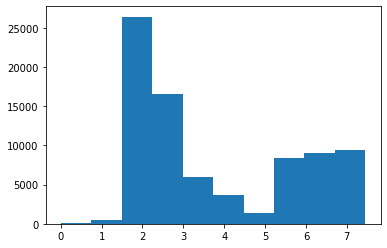

In [335]:
plt.hist(depth_aligned[depth_aligned > 0].flatten())

In [336]:
np.arange(0, 1, 0.1)
np.quantile(depth_aligned[depth_aligned > 0].flatten(), np.arange(0, 1, 0.1))

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

array([4.000e-03, 1.759e+00, 2.058e+00, 2.191e+00, 2.419e+00, 2.840e+00,
       3.635e+00, 5.570e+00, 6.079e+00, 6.816e+00])

In [337]:
a = cv2.imread(os.path.join(data_root, sequence_id, 'Depth/' + curr_frame[-34:-4] + '.png'), flags=-1).astype(float)
a /=1000
np.sum(a == 0)
np.mean(a[a>0])

127248

32.6434071237756

In [338]:

np.mean(depth_img[depth_img > 0])

4.0804258904719495

In [339]:
# plt.hist(depth_img.flatten())
np.sum(depth_aligned > 0)
np.sum(depth_img > 0)
depth_im.shape
depth_aligned.shape
424*512
np.mean(depth_aligned[depth_aligned > 0])
np.mean(depth_img[depth_img > 0])

81375

89840

(424, 512)

(1080, 1920)

217088

3.7525759631336397

4.0804258904719495

In [340]:
################### get scene point could of cur_frame_N ###################
rgb_im = cv2.imread(curr_frame)
# rgb_im = rgb_im[:, :, ::-1]
depth_im = cv2.imread(os.path.join(data_root, sequence_id, 'Depth/' + curr_frame[-34:-4] + '.png'), flags=-1)
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    o3d.geometry.Image((np.asarray(rgb_im)).astype(np.uint8)),
    o3d.geometry.Image((np.asarray(depth_aligned)).astype(np.float32)),
    depth_trunc=MAX_DEPTH,
    convert_rgb_to_intensity=False,
)
with open('../quantitative/calibration/Color.json') as f:
        camera_rgb = json.load(f) 
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(w, h, camera_rgb['f'][0], camera_rgb['f'][1], camera_rgb['c'][0], camera_rgb['c'][1]),
    # o3d.camera.PinholeCameraIntrinsic(w, h),
)  # cam coordinate

scene_verts = np.asarray(pcd.points)     # [h*w, 3], coordinate of each pixel in the depth map
scene_verts_aug = np.hstack([scene_verts, np.ones([scene_verts.shape[0], 1])])
with open('../quantitative/cam2world/vicon.json') as f:
        camera_ext = json.load(f)
cam_extr_ref = np.linalg.inv(camera_ext)
scene_verts = scene_verts_aug.dot(cam_extr_ref)[:, :3]      # camera to world transformation
pcd.points = o3d.utility.Vector3dVector(scene_verts) # world coordinate
# o3d.visualization.draw_geometries([pcd])
np.asarray(pcd.points).shape

(81375, 3)

In [341]:
np.max(np.asarray(depth_aligned).astype(np.float32))

7.452

In [342]:
np.asarray(pcd.points)

array([[-0.00393081,  0.00536513,  0.00323902],
       [-0.00323711,  0.00551474,  0.00298639],
       [-0.00455772,  0.00535785,  0.00348742],
       ...,
       [-0.00082493,  0.00133368, -0.00070741],
       [-0.00083991,  0.00136735, -0.00072278],
       [-0.00087252,  0.00153597, -0.0007816 ]])

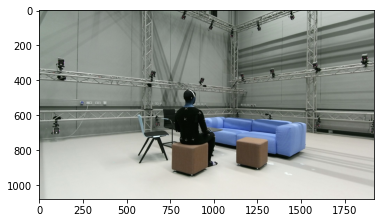

In [343]:
plt.imshow(np.asarray(rgbd_image.color))
# rgb_im.shape

In [344]:
# _____________ read keypoints and skeleton _____________
keyp_tuple = read_keypoints('../quantitative/keypoints/' + sequence_id + '/' + rgb_list[5][-34:-4] + '_keypoints.json', use_hands=False, use_face=False, use_face_contour=False)
keypoints = np.stack(keyp_tuple.keypoints)
keypoints.shape
# mask.shape[1]

(1, 25, 3)

In [345]:
# _____________ read keypoints and skeleton (pickle) _____________
path = "../quantitative/fittings/mosh/vicon_03301_01/results/s001_frame_00001__00.00.00.023/000.pkl"
with open(path, 'rb') as file:
    smpl = pickle.load(file, encoding='latin1')
smpl

{'transl': array([[-0.6994415 , -0.31427762,  0.9848179 ]], dtype=float32),
 'num_pca_comps': 12,
 'beta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'jaw_pose': array([[0., 0., 0.]], dtype=float32),
 'body_pose': array([[ 0.0590809 ,  0.05310533,  0.09144919,  0.06638564, -0.03938352,
         -0.03405466,  0.04605372,  0.03528766, -0.00767644, -0.01093746,
         -0.04850643, -0.04170513, -0.00294363,  0.09496448,  0.04342466,
          0.04438157, -0.05772606,  0.02723523,  0.02083636,  0.204744  ,
         -0.04182123,  0.00783336, -0.13903025,  0.09834542,  0.03948856,
         -0.01690864,  0.0097099 ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.11294897,  0.02547551,
          0.01097451,  0.05551571, -0.02713786, -0.38216677,  0.06716956,
          0.01517425,  0.40331653,  0.11045438, -0.00737314,  0.05088175,
          0.0304325 , -0.12942097, -0.5711655 ,  0.06874575,  0.0668682 ,
          0.5659935 ,  0.

In [346]:
smplx_model_path='../models_smplx_v1_1/models/smplx/SMPLX_NEUTRAL2.pkl'
with open(smplx_model_path, 'rb') as file:
    out = pickle.load(file, encoding='latini')

In [347]:
smplx_model_path='../models_smplx_v1_1/models/smplx/SMPLX_NEUTRAL2.pkl'
with open(smplx_model_path, 'wb') as file:
    pickle.dump(out, file)

In [348]:
import torch

# specify device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


print('-- pytorch version={}'.format(torch.__version__))
print('-- device={}'.format(device))

smplx_model_path='../models_smplx_v1_1/models/smplx/SMPLX_NEUTRAL2.pkl'

import smplx  # SMPL-X; pip install smplx

def get_smplx_model(gender, device):
    body_model_path = smplx_model_path
    body_model = smplx.create(body_model_path, 
                          model_type='smplx',        ## smpl, smpl+h, or smplx?
                          gender=gender, ext='npz',  ## file format 
                          num_pca_comps=12,          ## MANO hand pose pca component
                          create_global_orient=True, 
                          create_body_pose=True,
                          create_betas=True,
                          create_left_hand_pose=True,
                          create_right_hand_pose=True,
                          create_expression=True, 
                          create_jaw_pose=True,
                          create_leye_pose=True,
                          create_reye_pose=True,
                          create_transl=True,
                          batch_size=1               ## how many bodies in a batch?
                          )
    body_model.eval()
    return body_model

smplx_neutral = get_smplx_model(gender='neutral', device=device)


def draw_bodies(gender, betas, thetas):
    bm = smplx_neutral


    ## read verts and face from smplx model
    params = {'betas': betas,
              'body_pose': thetas
              }


    verts = bm(return_verts=True, **params).vertices.detach().cpu().numpy()[0]
    faces = bm.faces

    ## put verts and face into open3d, and compute surface normal
    coord = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5)
    body = o3d.geometry.TriangleMesh()
    body.vertices = o3d.utility.Vector3dVector(verts)
    body.triangles = o3d.utility.Vector3iVector(faces)
    body.vertex_normals = o3d.utility.Vector3dVector([])
    body.triangle_normals = o3d.utility.Vector3dVector([])
    body.compute_vertex_normals()
    o3d.visualization.draw_geometries([body, coord])
    
    return None


-- pytorch version=1.10.2
-- device=cpu


In [349]:
data = smpl
betas = torch.Tensor(data['beta']).reshape(1, -1)
body_pose = torch.Tensor(data['body_pose'])
global_orient= torch.Tensor(data['global_orient'])
transl=torch.Tensor(data['transl'])
out = smplx_neutral(return_joints=True, betas=betas, body_pose=body_pose, global_orient=global_orient, transl=transl)
joints = out.joints[:, :21].squeeze()
joint_locations = (joints)
body_joints_3d = (out.vertices.detach().cpu().numpy().squeeze())

In [350]:
body_joints_3d

array([[-0.64845455, -0.6978891 ,  1.6229868 ],
       [-0.6453289 , -0.70073915,  1.6220896 ],
       [-0.64521587, -0.701429  ,  1.6235468 ],
       ...,
       [-0.7683206 , -0.69977   ,  1.63098   ],
       [-0.7660532 , -0.7000109 ,  1.6318812 ],
       [-0.76385707, -0.70072234,  1.6327178 ]], dtype=float32)

In [351]:
LIMBS = [
(0, 1),  # head_center -> neck
(1, 2),  # neck -> right_clavicle
(2, 3),  # right_clavicle -> right_shoulder
(3, 4),  # right_shoulder -> right_elbow
(4, 5),  # right_elbow -> right_wrist
(1, 6),  # neck -> left_clavicle
(6, 7),  # left_clavicle -> left_shoulder
(7, 8),  # left_shoulder -> left_elbow
(8, 9),  # left_elbow -> left_wrist
(1, 10),  # neck -> spine0
(10, 11),  # spine0 -> spine1
(11, 12),  # spine1 -> spine2
(12, 13),  # spine2 -> spine3
(13, 14),  # spine3 -> spine4
(14, 15),  # spine4 -> right_hip
(15, 16),  # right_hip -> right_knee
(16, 17),  # right_knee -> right_ankle
(14, 18),  # spine4 -> left_hip
(18, 19),  # left_hip -> left_knee
(19, 20),  # left_knee -> left_ankle
]

In [352]:
A = body_joints_3d[np.asarray(LIMBS)[:, 0]]  # [n_limb, 3]
B = body_joints_3d[np.asarray(LIMBS)[:, 1]]  # [n_limb, 3]
n_pt = np.asarray(pcd.points).shape[0]
n_limb = A.shape[0]

A = np.tile(A, (n_pt, 1)).reshape(n_pt*n_limb, 3)  # [n_pt, n_limb, 3], n_pt=n_bps=scene_verts.shape[0]
B = np.tile(B, (n_pt, 1)).reshape(n_pt*n_limb, 3)
P = np.tile(np.asarray(pcd.points), n_limb).reshape(n_pt*n_limb, 3)

AB = B - A
AP = P - A
BP = P - B

temp_1 = np.multiply(AB, AP).sum(axis=-1)  # [n_pt, n_limb]
temp_2 = np.multiply(-AB, BP).sum(axis=-1)  # [n_pt, n_limb]
mask_1 = np.where(temp_1 <= 0)[0]   # angle between AB and AP >= 90
mask_2 = np.where((temp_1 > 0) * (temp_2 <= 0))[0]  # angle between AB and AP < 90 and angle between BA and BP >= 90
mask_3 = np.where((temp_1 > 0) * (temp_2 > 0))[0]   # angle between AB and AP < 90 and angle between BA and BP < 90
if len(mask_1) + len(mask_2) + len(mask_3) != n_pt*n_limb:
    print('[distance calculation] num of verts does not match!')

dist_1 = np.sqrt(np.sum((P[mask_1]-A[mask_1])**2, axis=-1))  # [n_mask_1]
dist_2 = np.sqrt(np.sum((P[mask_2]-B[mask_2])**2, axis=-1))  # [n_mask_2]

x = np.multiply(AB[mask_3], AP[mask_3]).sum(axis=-1) / np.multiply(AB[mask_3], AB[mask_3]).sum(axis=-1)  # [n_mask_3]
x = x.repeat(3).reshape(-1,3)
C = x * AB[mask_3] + A[mask_3]  # C: [n_mask_3, 3], the projected point of P on line segment AB
dist_3 = np.sqrt(np.sum((P[mask_3]-C)**2, axis=-1))  # n_mask_3

dist = np.zeros(n_pt*n_limb)
dist[mask_1] = dist_1
dist[mask_2] = dist_2
dist[mask_3] = dist_3
dist = dist.reshape(n_pt, n_limb)  # [n_pt, n_limb], distance from each point in scene verts to each limb
body_bps = np.min(dist, axis=-1)   # [n_pt]
body_bps.shape

(81375,)

In [353]:
curr_frame = rgb_list[5]
human_mask = cv2.imread(os.path.join(data_root, sequence_id, 'BodyIndexColor/' + curr_frame[-34:-4] + '.png'), cv2.IMREAD_GRAYSCALE)
h = human_mask.shape[0]
w = human_mask.shape[1]
human_mask =np.flip(human_mask, axis=1)
human_mask = human_mask.reshape(h*w)
human_mask_ind = np.where(human_mask == 0)[0]

depth_mask_ind = np.where(depth_aligned.flatten() == 0.)[0]
# where we have points in the point cloud
depth_nomask_ind = np.asarray(list(set(range(h*w))-set(depth_mask_ind)))  # indices of nonmasked pixels
# TODO set sky mask where depth_aligned > MAX_DEPTH.
depth_mask_sky_ind = ((depth_aligned.flatten() == 0) * (human_mask==False)).reshape(h*w)  # indices of sky

depth_mask_ind.shape
depth_nomask_ind.shape

(1,)

(2073599,)

In [354]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [355]:
#
# nomask = (mask == 255)
# mask = (nomask == False)
# mask_ind = np.where(mask == True)[0]
# nomask_ind = np.asarray(list(set(range(h*w))-set(mask_ind))).astype(int)
# # mask_ind.shape
# nomask_ind.shape
# # mask_ind
body_bps_full = np.zeros([h * w])
# body_bps_full[nomask_ind]
# body_bps_full
body_bps.shape
depth_nomask_ind.shape
body_bps_full.shape

(81375,)

(2073599,)

(2073600,)

(array([  145.,   521.,   489.,  1713.,  3115.,  5250., 19290., 37586.,
        12404.,   862.]),
 array([1.78390105, 1.78467724, 1.78545342, 1.78622961, 1.78700579,
        1.78778198, 1.78855816, 1.78933434, 1.79011053, 1.79088671,
        1.7916629 ]),
 <BarContainer object of 10 artists>)

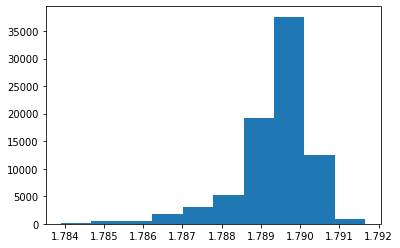

In [356]:
plt.hist(body_bps)

In [357]:
########### back to image plane, visualize bps feature map ###########
# print(cur_frame, cur_frame_N)
body_bps_full[depth_nomask_ind] = body_bps
body_bps_full[depth_mask_ind] = 1.8         # set masked pixels to 0
# body_bps_full[human_mask_ind] = 0.0
body_bps_full = body_bps_full.reshape((h, w))  # body bps feature map, [h, w]
body_bps_full = body_bps_full.astype(np.float32)
# np.save('{}/seq_{:04d}_fr_{:05d}.npy'.format(save_root, '/proximity/', curr_frame[-34:-4]), body_bps_full)
# np.save(save_root + '/first.png', body_bps_full)

plt.imshow(body_bps_full, cmap='plasma')
plt.colorbar()
plt.show()

# body_bps_full[body_bps_full>10] = 10
# fig = plt.imshow(body_bps_full, cmap='plasma', vmin=0, vmax=5)
# plt.axis('off')
# fig.axes.get_xaxis().set_visible(False)
# fig.axes.get_yaxis().set_visible(False)
# plt.imsave(save_root + '/first.png', body_bps_full, cmap='plasma')
# # plt.show()

ValueError: shape mismatch: value array of shape (81375,) could not be broadcast to indexing result of shape (2073599,)

(array([  81376.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1992224.]),
 array([1.7893003, 1.7903702, 1.7914402, 1.7925103, 1.7935802, 1.7946501,
        1.7957201, 1.7967901, 1.79786  , 1.7989299, 1.8      ],
       dtype=float32),
 <BarContainer object of 10 artists>)

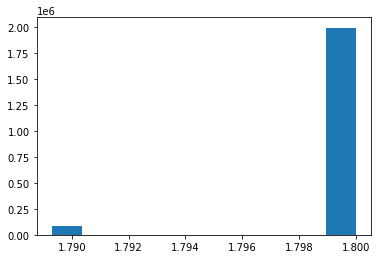

In [ ]:
plt.hist(body_bps_full.flatten())